In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
dataset = pd.read_csv("D:\Desktop\Envs\Git\Room Occupancy\Room-Occupancy-Predictions-Model\Occupancy_Estimation.csv")
dataset.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [6]:

dataset['datetime'] = pd.to_datetime(dataset['Date'] + ' ' + dataset['Time'])
dataset['Hour'] = dataset['datetime'].dt.hour
dataset['Day'] = dataset['datetime'].dt.day

We should use cyclical encoding on hour featur so that it represents 24 hour clock more closely for this we sine and cosine function that means we are creating two new features

In [7]:
dataset['hour_sin'] = np.sin(2 * np.pi * dataset['Hour'] / 24)
dataset['hour_cos'] = np.cos(2 * np.pi * dataset['Hour'] / 24)

dataset.drop(['Hour','datetime','Date','Time'],axis=1,inplace=True)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S1_Temp               10129 non-null  float64
 1   S2_Temp               10129 non-null  float64
 2   S3_Temp               10129 non-null  float64
 3   S4_Temp               10129 non-null  float64
 4   S1_Light              10129 non-null  int64  
 5   S2_Light              10129 non-null  int64  
 6   S3_Light              10129 non-null  int64  
 7   S4_Light              10129 non-null  int64  
 8   S1_Sound              10129 non-null  float64
 9   S2_Sound              10129 non-null  float64
 10  S3_Sound              10129 non-null  float64
 11  S4_Sound              10129 non-null  float64
 12  S5_CO2                10129 non-null  int64  
 13  S5_CO2_Slope          10129 non-null  float64
 14  S6_PIR                10129 non-null  int64  
 15  S7_PIR             

There are no null values 



In [9]:
dataset['S1_Sound_lag'] = dataset['S1_Sound'].shift(1)
dataset['S5_CO2_window'] = dataset['S5_CO2'].rolling(3).mean()
dataset.fillna(method='bfill',inplace=True)

C:\Users\Siddh\AppData\Local\Temp\ipykernel_12392\1036961748.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='bfill',inplace=True)


In [10]:
dataNum = dataset.copy()

corr_matrix = dataNum.corr()

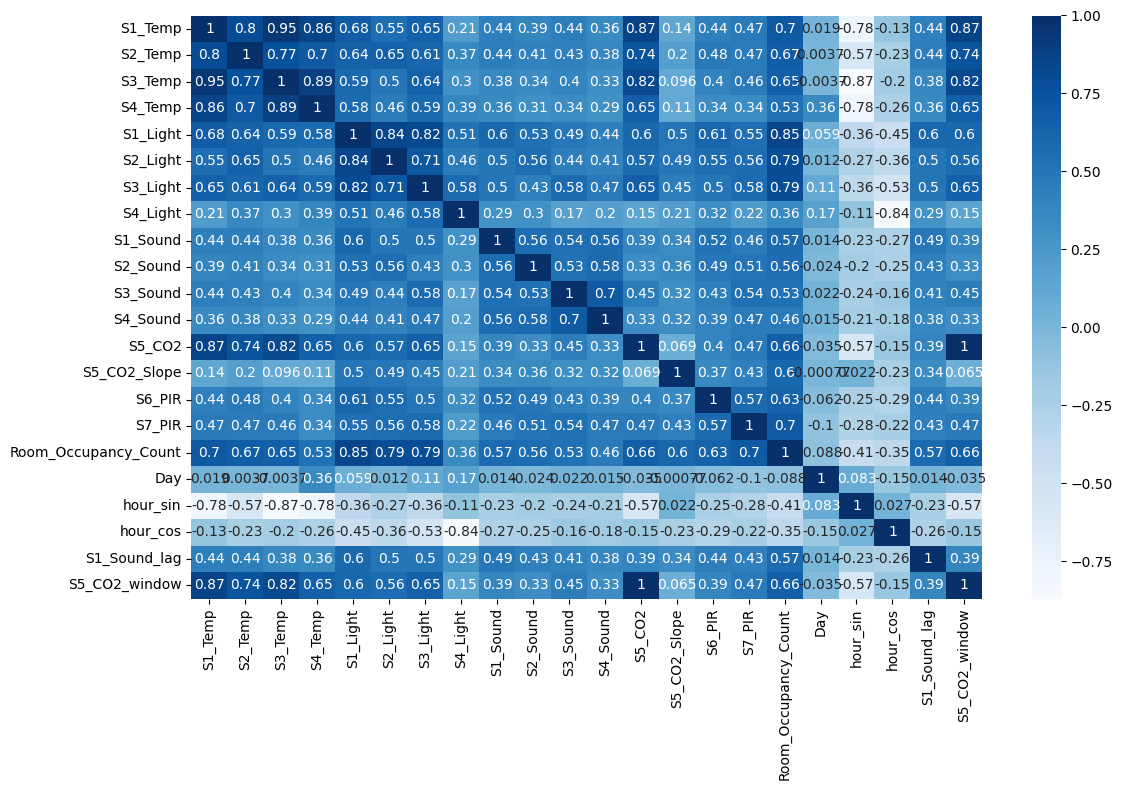

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_matrix,cmap='Blues',annot=True,ax=ax)
plt.tight_layout()
plt.show()

Date and Time are likely to be not related to our problem so we can ignore them.It seems Like most of the features have strong coorelation with our target. we can apply a threshold correlation of 0.5 to have the most strongly correlated features. 

In [12]:
corr_with_target = corr_matrix['Room_Occupancy_Count']
loosely_correlated_features = corr_with_target[corr_with_target < 0.5]

print(loosely_correlated_features)

S4_Light    0.355715
S4_Sound    0.460287
Day        -0.088434
hour_sin   -0.413478
hour_cos   -0.347821
Name: Room_Occupancy_Count, dtype: float64


In [13]:
dataNum.drop(['S4_Light','S4_Sound'],axis=1,inplace=True)
dataNum.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S1_Sound,S2_Sound,S3_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Day,hour_sin,hour_cos,S1_Sound_lag,S5_CO2_window
0,24.94,24.75,24.56,25.38,121,34,53,0.08,0.19,0.06,390,0.769231,0,0,1,22,0.5,-0.866025,0.08,390.0
1,24.94,24.75,24.56,25.44,121,33,53,0.93,0.05,0.06,390,0.646154,0,0,1,22,0.5,-0.866025,0.08,390.0
2,25.00,24.75,24.50,25.44,121,34,53,0.43,0.11,0.08,390,0.519231,0,0,1,22,0.5,-0.866025,0.93,390.0
3,25.00,24.75,24.56,25.44,121,34,53,0.41,0.10,0.10,390,0.388462,0,0,1,22,0.5,-0.866025,0.43,390.0
4,25.00,24.75,24.56,25.44,121,34,54,0.18,0.06,0.06,390,0.253846,0,0,1,22,0.5,-0.866025,0.41,390.0


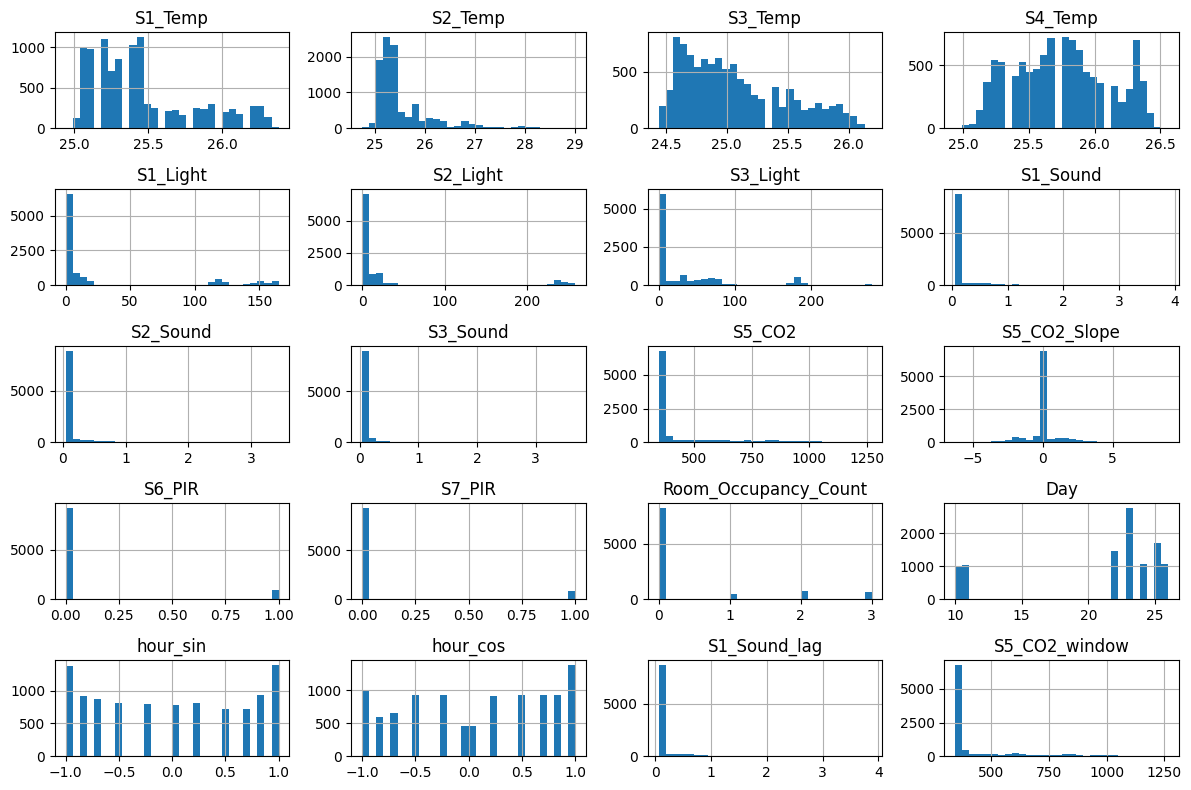

In [14]:
dataNum.hist(figsize=(12,8),bins= 30)
plt.tight_layout()
plt.show()

Before we scale some of this data we should split the data into our training and testing set

In [15]:


X = dataNum.drop('Room_Occupancy_Count',axis=1)
Y= dataNum.Room_Occupancy_Count
split_index = int(len(X) * 0.7)
X_train,X_test = X.iloc[:split_index],X.iloc[split_index:]
y_train,y_test = Y.iloc[:split_index],Y[split_index:]

In [16]:
print(np.shape(X_train))
print(np.shape(X_test))

(7090, 19)
(3039, 19)


In [17]:
dataNum.columns

Index(['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S5_CO2',
       'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count', 'Day',
       'hour_sin', 'hour_cos', 'S1_Sound_lag', 'S5_CO2_window'],
      dtype='object')

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

cont_feat = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S5_CO2','S5_CO2_Slope','Day',
       'hour_sin', 'hour_cos','S1_Sound_lag', 'S5_CO2_window']
binary_feat  = ['S6_PIR', 'S7_PIR']

preprocessing = ColumnTransformer(transformers=[
    ('cont',StandardScaler(),cont_feat),
    ('ionary','passthrough',binary_feat)
],
remainder='passthrough'
)



In [19]:
X_train_transformed = preprocessing.fit_transform(X_train)
X_test_transformed = preprocessing.transform(X_test)

Now that we have a preprocessing Pipeline we should focus on our model

In [20]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [21]:
models = {
          'RandomForest':RandomForestClassifier(max_depth=5,),
          'KNeighbors' : KNeighborsClassifier(),
          'SGDCLASS' : SGDClassifier(),
          'SVC' : SVC()
          }

In [22]:
print(models.items())

dict_items([('RandomForest', RandomForestClassifier(max_depth=5)), ('KNeighbors', KNeighborsClassifier()), ('SGDCLASS', SGDClassifier()), ('SVC', SVC())])


We will write function to fit transformed data and see which model primarily performs better then selecting the most promising ones we will perform hyperparameter tuning on them.Considering that our system will control the electricity in room pof building our model should focus on both precision and recall as We don't want too many FP and too many FN

In [23]:
def primary_model_eval(models):
    for key,item in models.items():
        item.fit(X_train_transformed,y_train)
        print(f"Training score of {key} is",f1_score(y_train,item.predict(X_train_transformed),average='weighted'))
        print(f"Testing score of {key} is",f1_score(y_test,item.predict(X_test_transformed),average='weighted'))
        

In [24]:
primary_model_eval(models)

Training score of RandomForest is 0.9961966400261834
Testing score of RandomForest is 0.8885285059893965
Training score of KNeighbors is 0.9957783422917904
Testing score of KNeighbors is 0.8466283392650759
Training score of SGDCLASS is 0.9949265947437218
Testing score of SGDCLASS is 0.480255739309807
Training score of SVC is 0.9969013515666441
Testing score of SVC is 0.4920938298847811


As RandomForest and Kneighbours is showing most promise we will focus on tuning their hyperparameters

In [25]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
random_parameters = {
    'classifier__max_depth':[2,4,8,16,32],
    'classifier__min_samples_leaf':[4,8,16,32,64],
    'classifier__max_features':[4,8,16,32,64],
    'classifier__max_leaf_nodes':[4,8,16,32,64],
    'classifier__n_estimators':[10,50,100,150,200],
    'classifier__class_weight' : ['balanced']
}

pipeline_random = Pipeline([
    ('preprocessor', preprocessing),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])



In [26]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV

tscv = TimeSeriesSplit(n_splits=5)
RandomSearch = RandomizedSearchCV(pipeline_random,random_parameters,n_iter=50,scoring='f1_weighted',cv=tscv)
RandomSearch.fit(X_train,y_train)

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cont',
                                                                               StandardScaler(),
                                                                               ['S1_Temp',
                                                                                'S2_Temp',
                                                                                'S3_Temp',
                                                                                'S4_Temp',
                                                                                'S1_Light',
                                                                                'S2_Light',
                                                                                'S3_Light',
                                                                                'S1_Sound',
                                                                                'S2_Sound',
                                                                                'S3_Sound',
                                                                                'S5_CO2',
                                                                                'S5_CO2_Slope',
                                                                                'Day'...
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=50,
                   param_distributions={'classifier__class_weight': ['balanced'],
                                        'classifier__max_depth': [2, 4, 8, 16,
                                                                  32],
                                        'classifier__max_features': [4, 8, 16,
                                                                     32, 64],
                                        'classifier__max_leaf_nodes': [4, 8, 16,
                                                                       32, 64],
                                        'classifier__min_samples_leaf': [4, 8,
                                                                         16, 32,
                                                                         64],
                                        'classifier__n_estimators': [10, 50,
                                                                     100, 150,
                                                                     200]},
                   scoring='f1_weighted')

In [27]:
RandomSearch.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cont', StandardScaler(),
                                                  ['S1_Temp', 'S2_Temp',
                                                   'S3_Temp', 'S4_Temp',
                                                   'S1_Light', 'S2_Light',
                                                   'S3_Light', 'S1_Sound',
                                                   'S2_Sound', 'S3_Sound',
                                                   'S5_CO2', 'S5_CO2_Slope',
                                                   'Day', 'hour_sin',
                                                   'hour_cos', 'S1_Sound_lag',
                                                   'S5_CO2_window']),
                                                 ('ionary', 'passthrough',
                                                  ['S6_PIR', 'S7_PIR'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=16,
                                        max_features=8, max_leaf_nodes=32,
                                        min_samples_leaf=4, n_estimators=150,
                                        random_state=42))])

In [28]:
neighbour_parameters = {
    'classifier__n_neighbors':[1,2,3,4,5,6,7,8]
}
pipeline_neighb = Pipeline([
    ('preprocessor', preprocessing),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier())
])

In [29]:
RandomSearch = RandomizedSearchCV(
    pipeline_neighb,neighbour_parameters,n_iter=50,cv= tscv,scoring='f1_weighted'
)
RandomSearch.fit(X_train,y_train)
print(RandomSearch.best_estimator_)

C:\Users\Siddh\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cont', StandardScaler(),
                                                  ['S1_Temp', 'S2_Temp',
                                                   'S3_Temp', 'S4_Temp',
                                                   'S1_Light', 'S2_Light',
                                                   'S3_Light', 'S1_Sound',
                                                   'S2_Sound', 'S3_Sound',
                                                   'S5_CO2', 'S5_CO2_Slope',
                                                   'Day', 'hour_sin',
                                                   'hour_cos', 'S1_Sound_lag',
                                                   'S5_CO2_window']),
                                                 ('ionary', 'passthrough',
                                                  ['S6_PIR', 'S7_PIR'])])),
             

In [30]:
def final_model_eval(models):
    for key,item in models.items():
        item.fit(X_train,y_train)
        print(f"Training score of {key} is",f1_score(y_train,item.predict(X_train),average='weighted'))
        print(f"Testing score of {key} is",f1_score(y_test,item.predict(X_test),average='weighted'))
        

In [31]:
final_pipeline_random = Pipeline([
    ('preprocessor', preprocessing),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(class_weight='balanced', max_depth=32, max_features=8,
                       max_leaf_nodes=32, min_samples_leaf=8, n_estimators=150))
])
final_pipeline_neighb = final_pipeline_neighb = Pipeline([
    ('preprocessor', preprocessing),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier(n_neighbors=8))
])
fianl_model_dict={
    'final_random' : final_pipeline_random,
    'final_neighbor':final_pipeline_neighb
}

for key,item in fianl_model_dict.items():
        item.fit(X_train,y_train)
        print(f"Training score of {key} is",f1_score(y_train,item.predict(X_train),average='weighted'))
        print(f"Testing score of {key} is",f1_score(y_test,item.predict(X_test),average='weighted'))


Training score of final_random is 0.9984487593894493
Testing score of final_random is 0.8987749960040049
Training score of final_neighbor is 0.9977481924293443
Testing score of final_neighbor is 0.8462259311715041


In [32]:
final_model = final_pipeline_random.named_steps['classifier']

# Step 2: Access the fitted preprocessor from the pipeline
preprocessor = final_pipeline_random.named_steps['preprocessor']


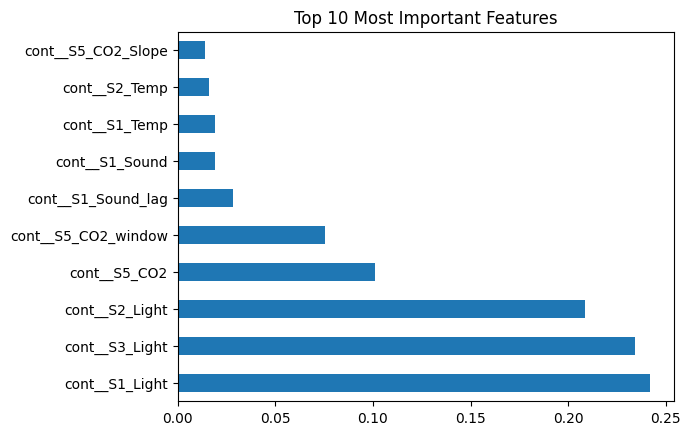

In [33]:

importances = final_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()

feature_importance_series = pd.Series(importances, index=feature_names)

feature_importance_series.nlargest(10).plot(kind='barh')
plt.title("Top 10 Most Important Features")
plt.show()

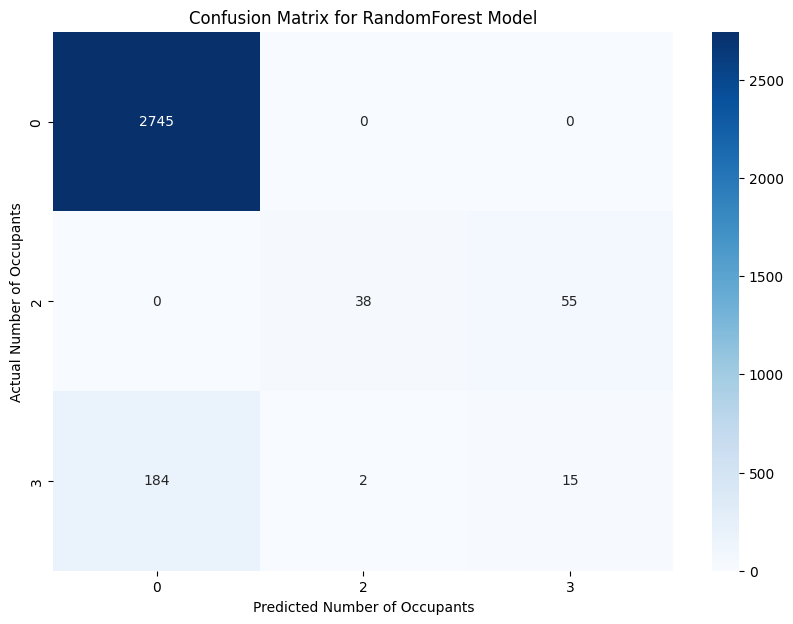

In [34]:
from sklearn.metrics import confusion_matrix
final_predictions = final_pipeline_random.predict(X_test)
matrix = confusion_matrix(y_pred=final_predictions,y_true=y_test)

plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y_test.unique()), 
            yticklabels=sorted(y_test.unique()))
plt.xlabel('Predicted Number of Occupants')
plt.ylabel('Actual Number of Occupants')
plt.title('Confusion Matrix for RandomForest Model')
plt.show()



In [35]:
print("Test Set Class Distribution:")
print(y_test.value_counts())

print("\n" + "="*30 + "\n")

# See the number of samples for each class in the training set
print("Training Set Class Distribution:")
print(y_train.value_counts())

Test Set Class Distribution:
Room_Occupancy_Count
0    2745
3     201
2      93
Name: count, dtype: int64


Training Set Class Distribution:
Room_Occupancy_Count
0    5483
2     655
3     493
1     459
Name: count, dtype: int64


The above results are expected as there is a huge class imbalanace. To counter this if your task is to just operate the electric supply based on if room is 
occupied then you can make the classifier to be a binary classifier as it will work just fine

In [39]:
dataNum['Room_Occupancy_Count'] = (dataNum['Room_Occupancy_Count'] > 0 ).astype(int)
dataNum.Room_Occupancy_Count.unique()

array([1, 0])

In [41]:
X = dataNum.drop('Room_Occupancy_Count',axis=1)
Y= dataNum.Room_Occupancy_Count
split_index = int(len(X) * 0.7)
X_train,X_test = X.iloc[:split_index],X.iloc[split_index:]
y_train,y_test = Y.iloc[:split_index],Y[split_index:]

In [42]:
RandomSearch = RandomizedSearchCV(pipeline_random,random_parameters,n_iter=50,scoring='f1_weighted',cv=tscv)
RandomSearch.fit(X_train,y_train)

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cont',
                                                                               StandardScaler(),
                                                                               ['S1_Temp',
                                                                                'S2_Temp',
                                                                                'S3_Temp',
                                                                                'S4_Temp',
                                                                                'S1_Light',
                                                                                'S2_Light',
                                                                                'S3_Light',
                                                                                'S1_Sound',
                                                                                'S2_Sound',
                                                                                'S3_Sound',
                                                                                'S5_CO2',
                                                                                'S5_CO2_Slope',
                                                                                'Day'...
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=50,
                   param_distributions={'classifier__class_weight': ['balanced'],
                                        'classifier__max_depth': [2, 4, 8, 16,
                                                                  32],
                                        'classifier__max_features': [4, 8, 16,
                                                                     32, 64],
                                        'classifier__max_leaf_nodes': [4, 8, 16,
                                                                       32, 64],
                                        'classifier__min_samples_leaf': [4, 8,
                                                                         16, 32,
                                                                         64],
                                        'classifier__n_estimators': [10, 50,
                                                                     100, 150,
                                                                     200]},
                   scoring='f1_weighted')

In [43]:
RandomSearch.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cont', StandardScaler(),
                                                  ['S1_Temp', 'S2_Temp',
                                                   'S3_Temp', 'S4_Temp',
                                                   'S1_Light', 'S2_Light',
                                                   'S3_Light', 'S1_Sound',
                                                   'S2_Sound', 'S3_Sound',
                                                   'S5_CO2', 'S5_CO2_Slope',
                                                   'Day', 'hour_sin',
                                                   'hour_cos', 'S1_Sound_lag',
                                                   'S5_CO2_window']),
                                                 ('ionary', 'passthrough',
                                                  ['S6_PIR', 'S7_PIR'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=32,
                                        max_features=32, max_leaf_nodes=4,
                                        min_samples_leaf=4, random_state=42))])

In [44]:
final_binary_pipeline =  Pipeline([
    ('preprocessor', preprocessing),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(class_weight='balanced', max_depth=32, max_features=32,
                       max_leaf_nodes=4, min_samples_leaf=4))
])

In [45]:
final_binary_pipeline.fit(X_train,y_train)
print(f"Training score of model is",f1_score(y_train,final_binary_pipeline.predict(X_train),average='weighted'))
print(f"Testing score of model is",f1_score(y_test,final_binary_pipeline.predict(X_test),average='weighted'))

Training score of model is 0.9995768222737024
Testing score of model is 0.9266477272474757


In [59]:
print(final_binary_pipeline.predict_proba(X_test)[:,1])
print([i for i in final_predictions if i > 0])


[0. 0. 0. ... 0. 0. 0.]
[0.007833333333333333, 0.005, 0.04708333333333333, 0.007833333333333333, 0.010333333333333332, 0.0025, 0.008333333333333333, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.008333333333333333, 0.0025, 0.0025, 0.0025, 0.005833333333333333, 0.007833333333333333, 0.007833333333333333, 0.013666666666666666, 0.0025, 0.0025, 0.011166666666666667, 0.005833333333333333, 0.005833333333333333, 0.008333333333333333, 0.010833333333333332, 0.04258333333333333, 0.008333333333333333, 0.008333333333333333, 0.006, 0.017666666666666667, 0.015166666666666667, 0.011833333333333331, 0.017166666666666667, 0.011833333333333331, 0.011833333333333331, 0.014666666666666666, 0.011833333333333331, 0.015166666666666667, 0.009333333333333334, 0.009333333333333334, 0.009333333333333334, 0.015166666666666667, 0.015166666666666667, 0.009333333333333334, 0.015166666666666667, 0.009333333333333334, 0.009333333333333334, 0.015166666666666667, 0.015166666666666667, 0.009333333333333334, 0.0093333

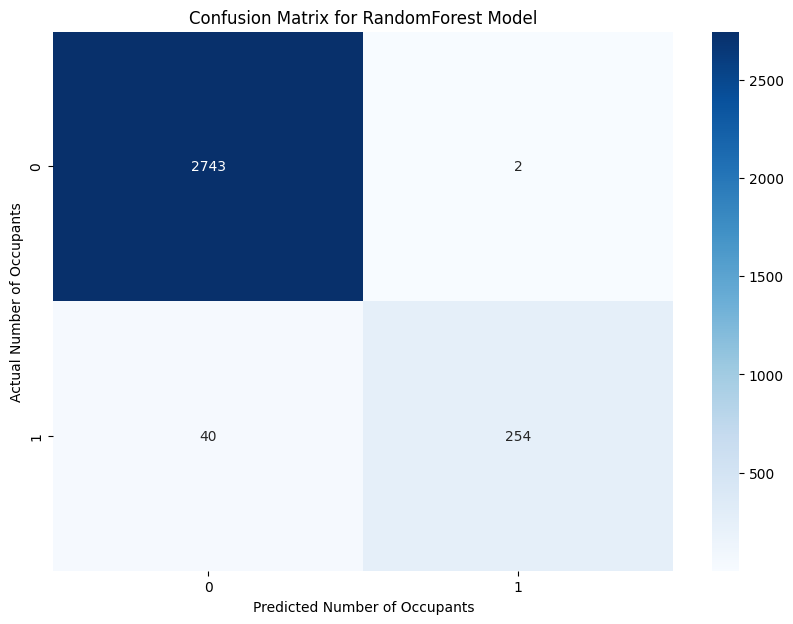

In [60]:
final_predictions = final_binary_pipeline.predict_proba(X_test)[:,1]
final_predictions_new = (final_predictions >= 0.005).astype(int)
matrix = confusion_matrix(y_pred=final_predictions_new,y_true=y_test)

plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y_test.unique()), 
            yticklabels=sorted(y_test.unique()))
plt.xlabel('Predicted Number of Occupants')
plt.ylabel('Actual Number of Occupants')
plt.title('Confusion Matrix for RandomForest Model')
plt.show()

In [61]:
import joblib

joblib.dump(final_pipeline_random,'Multi_Modle_Pipeline.joblib')

['Multi_Modle_Pipeline.joblib']

In [62]:
joblib.dump(final_binary_pipeline,'Binary_Model_Pipeline.joblib')

['Binary_Model_Pipeline.joblib']

In [63]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# A very simple pipeline with only standard sklearn components
# NO SMOTE, NO ColumnTransformer for this test.
simple_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Use only the numerical features from your training data for this test
simple_features = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 
                 'S2_Light', 'S3_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 
                 'S5_CO2', 'S5_CO2_Slope']

# Train this simple pipeline
simple_pipeline.fit(X_train[simple_features], y_train)

# Save this simple pipeline to a NEW file
joblib.dump(simple_pipeline, 'simple_model.joblib')

print("Simple test model saved to simple_model.joblib")

Simple test model saved to simple_model.joblib


In [64]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Assuming 'preprocessor' is your defined ColumnTransformer
# from the previous notebook cells.

# Create a pipeline with the preprocessor and classifier
pipeline_with_ct = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit it on the original (un-SMOTEd) training data
pipeline_with_ct.fit(X_train, y_train)

# Save it to a new file
joblib.dump(pipeline_with_ct, 'model_with_columntransformer.joblib')
print("Model with ColumnTransformer saved.")


Model with ColumnTransformer saved.
